<a href="https://colab.research.google.com/github/FranItu/CODOJOTRACK1/blob/main/BELTEXAM2/BELT_EXAM_2_Francisco_Iturralde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen 2: Evaluación de Pacientes

## Drive Mount and Library Importation

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
### Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
### Scaling, metrics, kmeans, dist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [18]:
### Database import
df = pd.read_csv('/content/drive/My Drive/Coding_Dojo/BELT EXAMS/BELTEXAM2/drug200.csv')

## Database Cleaning

In [19]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [20]:
for col in df:
  print(col, df[col].unique())

Age [23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]
Sex ['F' 'M']
BP ['HIGH' 'LOW' 'NORMAL']
Cholesterol ['HIGH' 'NORMAL']
Na_to_K [25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.938  9.709  9.084
 19.221 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796
 19.416 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703
 29.875  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.658 24.276
 13.967 19.675 10.605 22.905 17.069 20.909 11.198 19.161 13.313 10.84
 13.934  7.761  9.712 11.326 10.067 13.935 13.597 15.478 23.091 17.211
 16.594 15.156 29.45  29.271 15.015 11.424 38.247 25.395 35.639 16.725
 11.871 12.854 13.127  8.966 28.2

In [ ]:
#Enconding Criterions
# Male V Female can be encoded in Male or not, or viceversa. Hence it can be coded whithin itself with 'F' = 0 and 'M' = 1
# BP Can be Encoded in 2 Columns. Is_low and Is_high.
#                                   The former with: 'LOW' = 1 and 'HIGH' = 'NORMAL' = 0
#                                   The latter with: 'HIGH' = 1 and 'LOW' = 'NORMAL' = 0
# Cholesterol can be encoded itself as: 'HIGH' = 1 and 'NORMAL' = 0
#
# We can Encode the drugs later if we decide to group them for an unsupervised Algorithm.

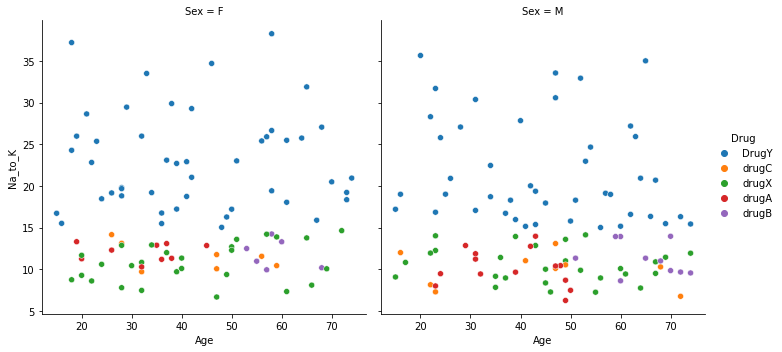

In [40]:
#Ploting Age vs NA_to_K with distintion of the applied drug and sex
sns.relplot(
    data=df, x="Age", y="Na_to_K",
    col="Sex", hue="Drug", kind="scatter")
plt.savefig('/content/drive/MyDrive/Coding_Dojo/BELT EXAMS/BELTEXAM2/fig1.png')

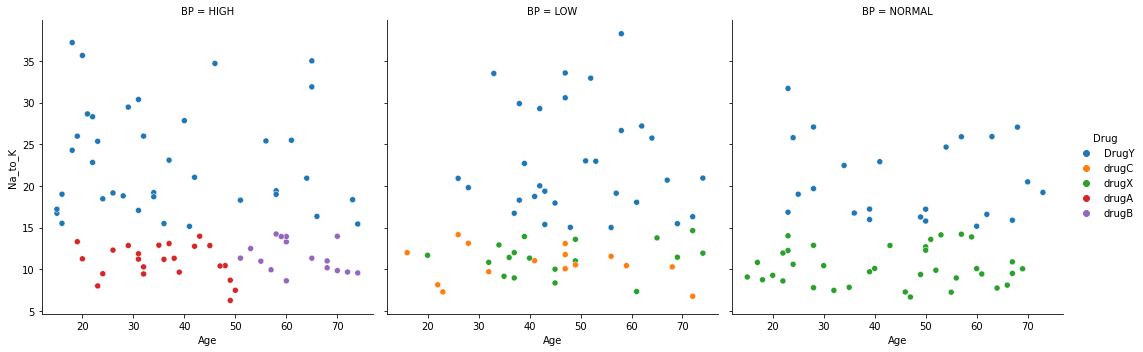

In [41]:
sns.relplot(
    data=df, x="Age", y="Na_to_K",
    col="BP", hue="Drug", kind="scatter")
plt.savefig('/content/drive/MyDrive/Coding_Dojo/BELT EXAMS/BELTEXAM2/fig2.png')

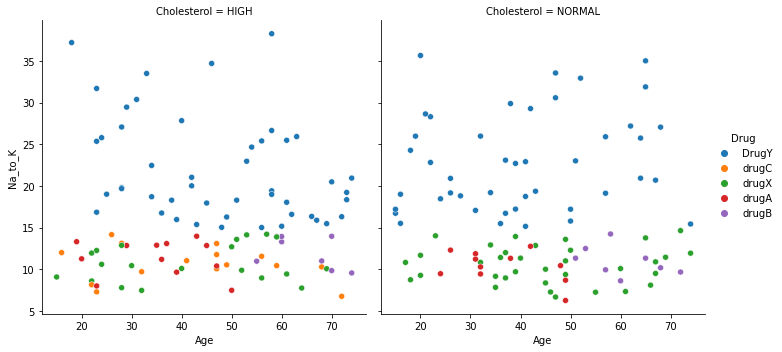

In [42]:
sns.relplot(
    data=df, x="Age", y="Na_to_K",
    col="Cholesterol", hue="Drug", kind="scatter")
plt.savefig('/content/drive/MyDrive/Coding_Dojo/BELT EXAMS/BELTEXAM2/fig3.png')

## Model

In [ ]:
### With the previous results, a regression looks like the proper way to make a prediction.

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [74]:
# cleanup criterions
cleanup_crit = {"Sex": {"F": 0, "M": 1},
                "Cholesterol": {"NORMAL": 0, "HIGH": 1}}
#encoded dataframe
enc_df = df.replace(cleanup_crit)
enc_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,1,25.355,DrugY
1,47,1,LOW,1,13.093,drugC
2,47,1,LOW,1,10.114,drugC
3,28,0,NORMAL,1,7.798,drugX
4,61,0,LOW,1,18.043,DrugY


In [75]:
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(enc_df[["BP"]])
bpencode = pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_)
enc_df = pd.concat([enc_df, bpencode],axis=1)
enc_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,"(HIGH,)","(LOW,)","(NORMAL,)"
0,23,0,HIGH,1,25.355,DrugY,1.0,0.0,0.0
1,47,1,LOW,1,13.093,drugC,0.0,1.0,0.0
2,47,1,LOW,1,10.114,drugC,0.0,1.0,0.0
3,28,0,NORMAL,1,7.798,drugX,0.0,0.0,1.0
4,61,0,LOW,1,18.043,DrugY,0.0,1.0,0.0


In [79]:
enc_df.columns

Index([        'Age',         'Sex',          'BP', 'Cholesterol',
           'Na_to_K',        'Drug',     ('HIGH',),      ('LOW',),
         ('NORMAL',)],
      dtype='object')

In [ ]:
enc_df.pop(('NORMAL',))

In [ ]:
enc_df.pop('BP')

In [88]:
list(enc_df.columns)

['Age', 'Sex', 'Cholesterol', 'Na_to_K', 'Drug', ('HIGH',), ('LOW',)]

In [90]:
enc_df.columns = ['Age', 'Sex', 'Cholesterol', 'Na_to_K', 'Drug', 'HIGHBP', 'LOWBP']
enc_df.head()

,Age,Sex,Cholesterol,Na_to_K,Drug,HIGHBP,LOWBP
0,23,0,1,25.355,DrugY,1.0,0.0
1,47,1,1,13.093,drugC,0.0,1.0
2,47,1,1,10.114,drugC,0.0,1.0
3,28,0,1,7.798,drugX,0.0,0.0
4,61,0,1,18.043,DrugY,0.0,1.0


In [93]:
#X, y, test and train
X = enc_df[['Age', 'Sex', 'Cholesterol', 'Na_to_K', 'HIGHBP', 'LOWBP']]
y = enc_df['Drug'].values
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [94]:
#Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
log_reg = LogisticRegression(penalty='l1',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 0.9928571428571429
Test accuracy: 0.9666666666666667


In [108]:
print("Los puntos de interseccion con el eje para los medicamentos: \n ['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'] \n son:\n", log_reg.intercept_)

Los puntos de interseccion con el eje para los medicamentos: 
 ['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'] 
 son:
 [ 1.08101115 -4.69701126 -4.36778825 -5.12043834 -3.29896493]


In [109]:
print("Los Coeficientes de las variables: \n  ['Age', 'Sex', 'Cholesterol', 'Na_to_K', 'HIGHBP', 'LOWBP'] \n son: \n", log_reg.coef_)

Los Coeficientes de las variables: 
  ['Age', 'Sex', 'Cholesterol', 'Na_to_K', 'HIGHBP', 'LOWBP'] 
 son: 
 [[ 0.          0.          0.          8.75144167  0.          0.        ]
 [-0.9931267   0.          0.05666348 -2.7497982   2.41700582  0.        ]
 [ 1.69903902 -0.24366747  0.         -0.89693379  1.80506863  0.        ]
 [ 0.          0.          1.76781884 -1.94613519  0.          1.97000279]
 [ 0.          0.         -1.34687859 -3.17435992 -3.47196258 -1.04476242]]


## Conclusiones

Con el conocimiento matematico y en base a las bases de datos, se considera que no es necesario hacer otro modelo. Ya que este modelo escalado aplica la regresion de forma adecuada y contundente.

Esto se ve reflejado adicionalmente en los altos indices de precision que se presentan en la seccion anterior.